In [3]:
import parse

In [4]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2018, day=23)

def parses(data):
    pos = [i.fixed for i in parse.findall('{:d},{:d},{:d}',data)]
    r = [i.fixed[0] for i in parse.findall('r={:d}',data)]
    return np.array(pos), np.array(r)

data = parses(puzzle.input_data)

In [5]:
sample = parses("""pos=<0,0,0>, r=4
pos=<1,0,0>, r=1
pos=<4,0,0>, r=3
pos=<0,2,0>, r=1
pos=<0,5,0>, r=3
pos=<0,0,3>, r=1
pos=<1,1,1>, r=1
pos=<1,1,2>, r=1
pos=<1,3,1>, r=1""")

In [6]:
def solve_a(data):
    pos, r = data
    i = np.argmax(r)
    distances = (abs(pos-pos[i])).sum(axis=1)
    return (distances <= r[i]).sum()

In [7]:
solve_a(sample)

7

In [8]:
solve_a(data)

889

In [9]:
from scipy.spatial.distance import cdist

In [10]:
sample

(array([[0, 0, 0],
        [1, 0, 0],
        [4, 0, 0],
        [0, 2, 0],
        [0, 5, 0],
        [0, 0, 3],
        [1, 1, 1],
        [1, 1, 2],
        [1, 3, 1]]),
 array([4, 1, 3, 1, 3, 1, 1, 1, 1]))

# Part 2

In [11]:
sample = parses("""pos=<10,12,12>, r=2
pos=<12,14,12>, r=2
pos=<16,12,12>, r=4
pos=<14,14,14>, r=6
pos=<50,50,50>, r=200
pos=<10,10,10>, r=5""")

In [12]:
p, r = sample

In [16]:
a, b = p.sum(1) - r, p.sum(1) + r

In [18]:
a,b

(array([ 32,  36,  36,  36, -50,  25]), array([ 36,  40,  44,  48, 350,  35]))

In [57]:
import networkx as nx

array([[ -1,   4,   6,   8, 202,   7],
       [  4,  -1,   6,   8, 202,   7],
       [  6,   6,  -1,  10, 204,   9],
       [  8,   8,  10,  -1, 206,  11],
       [202, 202, 204, 206,  -1, 205],
       [  7,   7,   9,  11, 205,  -1]])

In [62]:
# overlap ^= np.eye(9, dtype=bool)

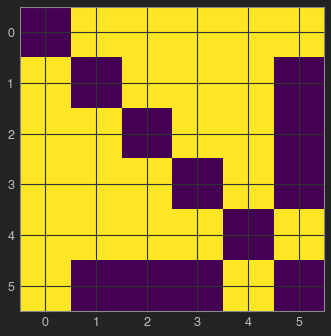

In [63]:
plt.imshow(overlap)

In [69]:
G = nx.Graph()

In [76]:
G.add_edge(1,0)

In [77]:
G.edges

EdgeView([(0, 1)])

In [78]:
(1,0) in G.edges

True

In [80]:
for u, v in np.argwhere(overlap):
    G.add_edge(u,v)

In [86]:
from networkx.algorithms.clique import find_cliques

In [64]:
def solve_b(data):
    import networkx as nx
    from networkx.algorithms.clique import find_cliques
    # 1. Computes graph of overlaps and searches for max-clique
    # 2. Given points in max_clique, it computes
    points, radii = data
    distances = cdist(points, points, metric='cityblock')
    max_dist = np.sum(np.meshgrid(radii,radii), axis=0)
    np.fill_diagonal(max_dist,-1)
    G = nx.Graph()
    for u, v in np.argwhere(distances <= max_dist):
        G.add_edge(u,v)
    max_clique = max(find_cliques(G), key=len)
    margin = abs(points[max_clique]).sum(1) - radii[max_clique]
    return max(margin)

In [65]:
solve_b(sample)

36

In [21]:
x = [2,1,3]
x.remove(2)
x

[1, 3]

In [60]:

def solve_b_intervals(data):
    # Cheeky fast solution that does not find the point but just its magnitude
    # Each point,radius can be encoded as an interval of magnitudes as 
    # (L1(point)-r, L1(point)+r). We can compute the intersection of all
    # the intervals and if its non-empty the start of the interval is our solution

    # Since using all points is unfeasible, we can just try removing points and check
    # whether they get us closer to a feasible interval using a heap to ensure we 
    # check the most promising interval
    from heapq import heappush, heappop    
    points, radii = data
    lows, highs = abs(points).sum(1)-radii, abs(points).sum(1)+radii
    low, high = lows.max(), highs.min()
    violation = low-high
    if violation <= 0:
        return low
    heap = [(violation,list(range(len(points))))]
    while True:
        violation, i = heappop(heap)
        for n in i:
            j = i.copy()
            j.remove(n)
            low2, high2 = lows[j].max(), highs[j].min()
            violation2 = low2 - high2
            if violation2 <= 0:
                return low2
            elif violation2 < violation:
                heappush(heap, (violation2,j))


In [61]:
solve_b_intervals(data)

160646364

In [ ]:
160646364

In [81]:
def solve_b_smtsolver(data):
    points, radii = data
    points, radii = points.tolist(), radii.tolist()
    from z3 import Int, If, Optimize, Sum
    abs = lambda x: If(x >= 0,x,-x)
    x, y, z = Int('x'), Int('y'), Int('z')

    opt = Optimize()
    
    def manhattan(p1, p2):
        return sum(abs(x1-x2) for x1,x2 in zip(p1,p2))
    X = (x, y, z)
    total_inrange = Sum([If(manhattan(X, p) <= r, 1, 0) 
                         for i, (p, r) in enumerate(zip(points, radii))])
    origin_distance = manhattan(X, (0,0,0))
    c1 = opt.maximize(total_inrange)
    c2 = opt.minimize(origin_distance)
    if opt.check():
        return opt.lower(c2).as_long()

In [83]:
solve_b_smtsolver(data)

160646364

In [258]:
solve_b_octree(data)

160646364

In [190]:
sample

(array([[10, 12, 12],
        [12, 14, 12],
        [16, 12, 12],
        [14, 14, 14],
        [50, 50, 50],
        [10, 10, 10]]),
 array([  2,   2,   4,   6, 200,   5]))

In [ ]:
160646364
307450855

In [ ]:
# def intersect(p1, p2, r1, r2):
#     assert abs(p1-p2).abs <= r1 + r2
#     slack = abs(p1-p2).sum()

# solve_b(sample)

# import torch
# from torch import nn
# from torch.optim import SGD, Adam

# mc = solve_b(data)

# points = torch.Tensor(data[0][mc])
# r = torch.Tensor(data[1][mc])



# # x = nn.Parameter(torch.Tensor([0,0,0]))
# # x = nn.Parameter(torch.Tensor([56721516., 49483604., 54441240.]))
# optim = SGD([x], lr=0.03, momentum=0.9)

# for i in range(1_000_000):
#     optim.zero_grad()
#     loss_error = torch.max(abs(x-points).sum(1) - r, torch.zeros_like(r)).sum()
#     loss_origin = torch.sum(x)
#     loss = loss_error + 1* loss_origin #+ torch.frac(x).abs().sum())
#     loss.backward()
#     optim.step()
#     if i % 1000 == 0:
#         print(loss_error.item(), loss_origin.item())

# torch.max(abs(x-points).sum(1) - r, torch.zeros_like(r)) #.sum()



# x

# torch.round(x)

# torch.round(x)



# solve_b(data)

# import math

# x

# a,b,c = np.array([56721516, 49483604, 54441236])

# N = 100
# p = data[0][mc]
# r = data[1][mc]

# for x in range(a-N,a+N):
#     for y in range(b-N,b+N):
#         for z in range(c-N,c+N):
#             candidate = np.array([x,y,z])
#             if (abs(p - candidate).sum(1) <= r).all():
#                 print(candidate)

# p - candidate)

# candidate 



